In [ ]:
!pip install PyDrive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1yvtBH4GpAjjBTbb3xw-rzG2tLgDdY-fV'})

In [ ]:
download.GetContentFile('churn_prediction1.zip')
!unzip churn_prediction1.zip

Archive:  churn_prediction1.zip
replace churn_prediction1/sample_OoSmYo5.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: churn_prediction1/sample_OoSmYo5.csv  
replace churn_prediction1/test_lTY72QC.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: churn_prediction1/test_lTY72QC.csv  
replace churn_prediction1/train_PDjVQMB (1).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: churn_prediction1/train_PDjVQMB (1).csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('churn_prediction1/train_PDjVQMB (1).csv')

In [ ]:
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [ ]:
data.shape

(6650, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   int64  
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 571.6+ KB


In [ ]:
data.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

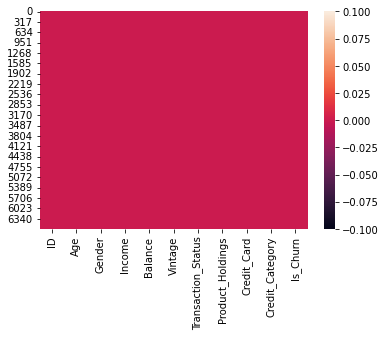

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
exited = len(data[data['Is_Churn'] == 1]['Is_Churn'])
not_exited = len(data[data['Is_Churn'] == 0]['Is_Churn'])
exited_perc = round(exited/len(data)*100,1)
not_exited_perc = round(not_exited/len(data)*100,1)

print('Number of clients that have exited the program: {} ({}%)'.format(exited, exited_perc))
print('Number of clients that haven\'t exited the program: {} ({}%)'.format(not_exited, not_exited_perc))

Number of clients that have exited the program: 1537 (23.1%)
Number of clients that haven't exited the program: 5113 (76.9%)


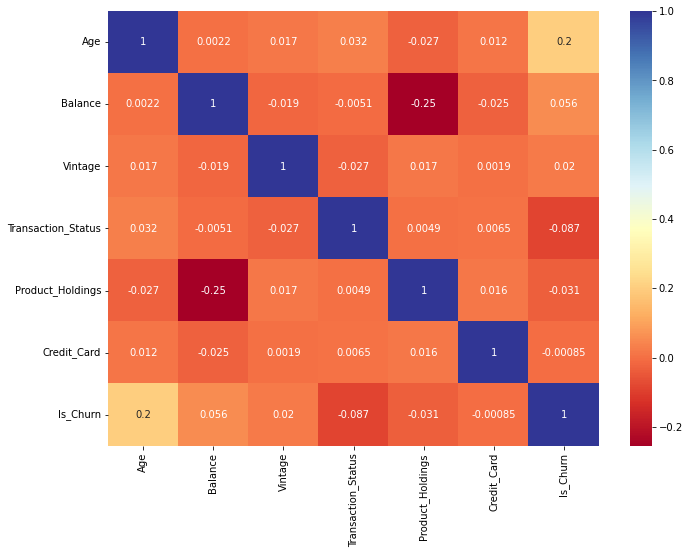

In [ ]:
plt.subplots(figsize=(11,8))
sns.heatmap(data.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [ ]:
data.drop(['ID'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelEncoder = LabelEncoder()

data['Gender'] = labelEncoder.fit_transform(data['Gender'])
data['Income'] = labelEncoder.fit_transform(data['Income'])
data['Credit_Category'] = labelEncoder.fit_transform(data['Credit_Category'])

data.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,0,1,563266.44,4,0,1,0,0,1
1,53,0,2,875572.11,2,1,1,1,2,0
2,35,0,3,701607.06,2,1,2,0,2,0
3,43,0,3,1393922.16,0,1,2,1,2,1
4,39,0,3,893146.23,1,1,1,1,1,1


In [ ]:
X0=data.drop('Is_Churn', axis=1)
y= data.Is_Churn

In [ ]:
X0.columns

Index(['Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category'],
      dtype='object')

In [ ]:
X1= pd.get_dummies(X0, drop_first = True)
X1.shape

(6650, 9)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X1, y, train_size=0.80,test_size=0.20,random_state=1)

In [ ]:
print(X_train.isnull().sum().any())
print(X_valid.isnull().sum().any())
print(y_train.isnull().sum().any())
print(y_valid.isnull().sum().any())

False
False
False
False


In [ ]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
X_train.head(3)

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
102,37,1,3,36045.00,4,0,2,0,0
589,32,1,3,1055860.56,4,1,1,0,2
5323,30,0,1,2151102.15,1,1,2,0,1


Accuracy is:  74  %


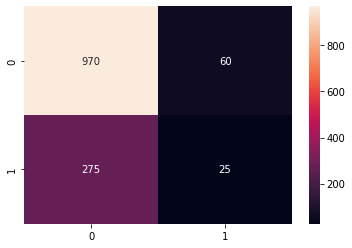

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=20 ,random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_valid,clf_rf.predict(X_valid))
print('Accuracy is: ',int(ac*100)," %")
cm = confusion_matrix(y_valid,clf_rf.predict(X_valid))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_valid, y_valid)
a = select_feature.scores_
b = X_train.columns
df = pd.DataFrame(list(zip(b, a)),
               columns =['Column', 'Score'])
df.dtypes

Column     object
Score     float64
dtype: object

In [ ]:
df['Score'] = df['Score'].replace(np.nan, 0)
df['Score'] = df['Score'].astype(int)
df.sort_values(by='Score',ascending=False)

,Column,Score
3,Balance,11310
0,Age,100
5,Transaction_Status,6
1,Gender,1
2,Income,1
8,Credit_Category,1
4,Vintage,0
6,Product_Holdings,0
7,Credit_Card,0


In [ ]:
y_pred=clf_rf.predict(X1)

In [ ]:
test0=pd.read_csv('churn_prediction1/test_lTY72QC.csv')
test0.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3,0,Good


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# one-hot encoding of categorical variables

labelEncoder = LabelEncoder()

test0['Gender'] = labelEncoder.fit_transform(test0['Gender'])
test0['Income'] = labelEncoder.fit_transform(test0['Income'])
test0['Credit_Category'] = labelEncoder.fit_transform(test0['Credit_Category'])

test0.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,0,3,1008636.39,2,1,2,1,0
1,9aededf2,36,1,1,341460.72,2,0,2,1,0
2,a5034a09,25,0,0,439460.10,0,0,2,1,1
3,b3256702,41,1,2,28581.93,0,1,2,1,2
4,dc28adb5,48,1,3,1104540.03,2,1,3,0,1


In [ ]:
test=test0.copy()

In [ ]:
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,0,3,1008636.39,2,1,2,1,0
1,9aededf2,36,1,1,341460.72,2,0,2,1,0
2,a5034a09,25,0,0,439460.10,0,0,2,1,1
3,b3256702,41,1,2,28581.93,0,1,2,1,2
4,dc28adb5,48,1,3,1104540.03,2,1,3,0,1


In [ ]:
test.drop(['ID'],axis=1,inplace= True)
test1= pd.get_dummies(test, drop_first = True)

In [ ]:
a = (test1.isnull().sum())
print(a[a>0])

Series([], dtype: int64)


In [ ]:
test1.fillna(0,inplace=True)

In [ ]:
results =clf_rf.predict(test1)

In [ ]:
submission = pd.DataFrame({
        "ID": test0["ID"],
        "Is_Churn": results
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
submission.shape

(2851, 2)

In [ ]:
submission.isnull().sum()

ID          0
Is_Churn    0
dtype: int64

In [ ]:
import time

In [ ]:
# important libraries

from sklearn.model_selection import GridSearchCV

# models

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# this method will show us the details of each model
# which will help us in deciding the best model

def best_model(model):
  print(model.best_score_)
  print(model.best_params_)
  print(model.best_estimator_)

In [ ]:
# SGD classifier

start_time = time.time()

parameters = {'loss': ['hinge', 'log'],
              'max_iter': [50, 100, 200, 300], 
              'fit_intercept':[True],
              'penalty':['l2'],
              'tol':[0.00001, 0.0001, 0.000001]}

SGD_grid_model = GridSearchCV(SGDClassifier(), 
                              param_grid=parameters, 
                              cv=10, 
                              refit=True, 
                              verbose=0)

SGD_grid_model.fit(data.loc[:, data.columns != 'Is_Churn'], data.Is_Churn)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SGD_grid_model)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[INFO] Time taken: 13.4 seconds.

0.715187969924812
{'fit_intercept': True, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l2', 'tol': 1e-06}
SGDClassifier(max_iter=100, tol=1e-06)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
# SGD classifier

sgd_model = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                          early_stopping=False, epsilon=0.1, eta0=0.0,
                          fit_intercept=True, l1_ratio=0.15,
                          learning_rate='optimal', loss='log', max_iter=300,
                          n_iter_no_change=5, n_jobs=None, penalty='l2', 
                          power_t=0.5, random_state=None, shuffle=True,
                          tol=1e-06, validation_fraction=0.1, verbose=0,
                          warm_start=False)

sgd_model.fit(data.loc[:, data.columns != 'Is_Churn'], data.Is_Churn)

SGDClassifier(loss='log', max_iter=300, tol=1e-06)

In [ ]:
results1=sgd_model.predict(test1)

In [ ]:
submission = pd.DataFrame({
        "ID": test0["ID"],
        "Is_Churn": results
    })

submission.to_csv('submission.csv', index=False)